<a href="https://colab.research.google.com/github/netphoenix/ds_belhard/blob/main/hw6/ds_hw6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Домашняя работа №6 «Data Science начальный уровень»
Author: Скробат Александр (tg @FlamePhnx)

Финальная работа

1. Взять набор данных исходя из ваших интересов.
2. Не используйте датасеты, которые вы уже брали.
3. Описать колонки, какие характеристики.
4. Проведите анализ EDA.
5. Провести предварительную обработку данных, если это необходимо (сделать данные понятными для модели машинного обучения: заполнить пропущенные значения, заменить категориальные признаки и т.д.)
6. Решить задачу сегментации или анализа временного ряда при помощи не менее 5-ти подходов ML. Составьте ансамбль моделей.
7. Решить задачу поиска аномалий.
8. Визуализация. Создать графики ошибок прогнозирования, метрик качества обученной модели и важности признаков.
9. Результат выполнения финальной работы разместить в гит репозиторий.


Возьмем датасет отражающий историческую информацию о ценах на ведущие криптовалюты

# Анализ и прогнозирование цен на криптовалюту (Bitcoin)
https://www.kaggle.com/datasets/sudalairajkumar/cryptocurrencypricehistory

In [53]:
# !pip install tensorflow

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, IsolationForest
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import StandardScaler

# Для нейронных сетей
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input

# Для подготовки данных
from sklearn.preprocessing import MinMaxScaler

# Настройки для графиков
plt.style.use('seaborn-v0_8-whitegrid')

# pd.set_option('display.float_format', '{:.6f}'.format)  # количество знаков после запятой


In [7]:
# Date :       дата наблюдения
# Open :       цена открытия в данный день
# High :       самая высокая цена в данный день
# Low :        самая низкая цена в данный день
# Close :      цена закрытия в данный день
# Volume :     объем транзакций в данный день
# Market Cap : рыночная капитализация в долларах США

import kagglehub

path = kagglehub.dataset_download("sudalairajkumar/cryptocurrencypricehistory")

print("Path to dataset files:", path)
!ls {path}

Using Colab cache for faster access to the 'cryptocurrencypricehistory' dataset.
Path to dataset files: /kaggle/input/cryptocurrencypricehistory
coin_Aave.csv		coin_EOS.csv	   coin_Stellar.csv
coin_BinanceCoin.csv	coin_Ethereum.csv  coin_Tether.csv
coin_Bitcoin.csv	coin_Iota.csv	   coin_Tron.csv
coin_Cardano.csv	coin_Litecoin.csv  coin_Uniswap.csv
coin_ChainLink.csv	coin_Monero.csv    coin_USDCoin.csv
coin_Cosmos.csv		coin_NEM.csv	   coin_WrappedBitcoin.csv
coin_CryptocomCoin.csv	coin_Polkadot.csv  coin_XRP.csv
coin_Dogecoin.csv	coin_Solana.csv


In [ ]:
!ls /content/sample_data


anscombe.json		      coin_Bitcoin_full.csv  README.md
california_housing_test.csv   mnist_test.csv
california_housing_train.csv  mnist_train_small.csv


In [9]:
# df = pd.read_csv('/kaggle/input/cryptocurrencypricehistory/coin_Bitcoin.csv')

# Возьмем актуальные данные для анализа
# https://coinmarketcap.com/currencies/bitcoin/historical-data
df = pd.read_csv('/content/sample_data/coin_Bitcoin_full.csv')
print(f"Cryptocurrency Historical Prices dataset -  rows: {df.shape[0]}, columns: {df.shape[1]}")

Cryptocurrency Historical Prices dataset -  rows: 4538, columns: 10


In [10]:
display(df.head())

print("\nОбщая информация о датасете:")
display(df.info())

print("\nСтатистическое описание:")
display(df.describe())


,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09



Общая информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4538 entries, 0 to 4537
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        4538 non-null   int64  
 1   Name       4538 non-null   object 
 2   Symbol     4538 non-null   object 
 3   Date       4538 non-null   object 
 4   High       4538 non-null   float64
 5   Low        4538 non-null   float64
 6   Open       4538 non-null   float64
 7   Close      4538 non-null   float64
 8   Volume     4538 non-null   float64
 9   Marketcap  4538 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 354.7+ KB


None


Статистическое описание:


,SNo,High,Low,Open,Close,Volume,Marketcap
count,4538.00000,4538.000000,4538.000000,4538.000000,4538.000000,4.538000e+03,4.538000e+03
mean,2269.50000,23179.571144,22228.055473,22714.509014,22739.620490,1.857072e+10,4.380145e+11
std,1310.15209,30209.089119,29141.063205,29686.001398,29715.770720,2.190039e+10,5.879559e+11
min,1.00000,74.561096,65.526001,68.504997,68.431000,0.000000e+00,7.784112e+08
25%,1135.25000,662.953979,636.620972,651.951004,653.288025,7.406615e+07,9.678580e+09
50%,2269.50000,8958.509766,8598.408699,8791.714844,8801.748864,1.301299e+10,1.560502e+11
75%,3403.75000,36561.922985,34161.379346,35533.046833,35550.906766,3.029901e+10,6.734725e+11
max,4538.00000,126198.069603,123196.048902,124752.139724,124752.528352,3.509679e+11,2.486340e+12


In [11]:
# Проверим, есть ли пропущенные данные

total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()
# print(df.isna().sum())

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
# Преобразование даты
df['Date'] = pd.to_datetime(df['Date'])

# Сортировка по дате (важно для временных рядов)
df.sort_values(by='Date', inplace=True)

# Удаление ненужных колонок
# SNo, Name, Symbol не нужны
df.drop(['SNo', 'Name', 'Symbol'], axis=1, inplace=True)

print("Данные после предобработки:")
display(df.head())


Данные после предобработки:


,Date,High,Low,Open,Close,Volume,Marketcap
0,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
1,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
3,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
4,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09


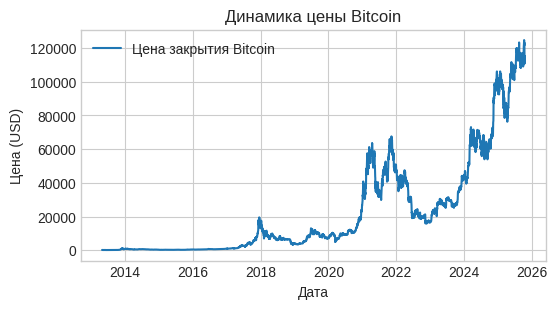

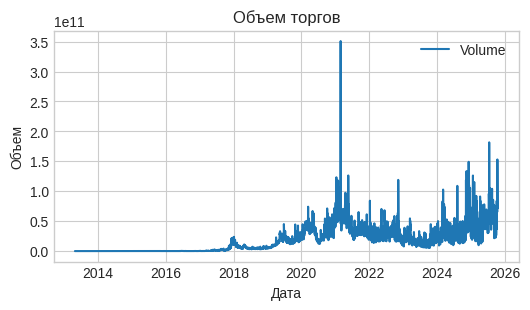

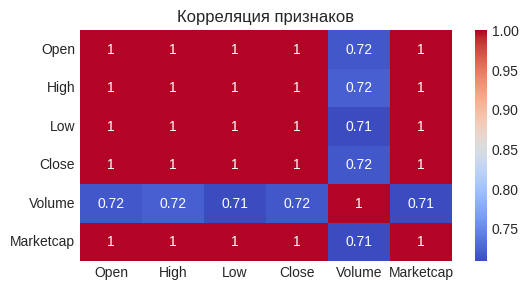

In [13]:
# визуализация цен и объемов

plt.figure(figsize=(6, 3))
plt.plot(df['Date'], df['Close'], label='Цена закрытия Bitcoin')
plt.title('Динамика цены Bitcoin')
plt.xlabel('Дата')
plt.ylabel('Цена (USD)')
plt.legend()
plt.show()

plt.figure(figsize=(6,3))
plt.plot(df['Date'], df['Volume'], label='Volume')
plt.title('Объем торгов')
plt.xlabel('Дата')
plt.ylabel('Объем')
plt.legend()
plt.show()

# Матрица корреляций
plt.figure(figsize=(6,3))
sns.heatmap(df[['Open', 'High', 'Low', 'Close', 'Volume', 'Marketcap']].corr(), annot=True, cmap='coolwarm')
plt.title('Корреляция признаков')
plt.show()

In [14]:
# На основе даты можно возможно полезные признаки, которые могут помочь модели
# уловить сезонные или годовые закономерности, если они есть конечно
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['DayOfWeek'] = df['Date'].dt.dayofweek

# Добавляем производные показатели, которые помогают моделям лучше понимать динамику
# Создадим "лаги" - значения цены за предыдущие дни.
df['Lag_1'] = df['Close'].shift(1) # Цена вчера
df['Lag_3'] = df['Close'].shift(3) # Цена 3 дня назад
df['Lag_7'] = df['Close'].shift(7) # Цена неделю назад

# Скользящее среднее - средняя цена за последние N дней. Помогает сгладить шум
df['Rolling_Mean_7'] = df['Close'].rolling(window=7).mean()
df['Rolling_STD_7'] = df['Close'].rolling(7).std() # Скользящее стандартное отклонение (волатильность)
df['Return'] = df['Close'].pct_change() # Изменение цены в процентах
df['EMA_10'] = df['Close'].ewm(span=10, adjust=False).mean()  # Экспоненциальное среднее

df = df.dropna()

# Удалим строки с NaN, которые появились после создания лагов и скользящих средних
df.dropna(inplace=True)

print(df.head())

                  Date        High         Low        Open       Close  \
7  2013-05-06 23:59:59  124.663002  106.639999  115.980003  112.300003   
8  2013-05-07 23:59:59  113.444000   97.699997  112.250000  111.500000   
9  2013-05-08 23:59:59  115.779999  109.599998  109.599998  113.566002   
10 2013-05-09 23:59:59  113.459999  109.260002  113.199997  112.669998   
11 2013-05-10 23:59:59  122.000000  111.551003  112.799004  117.199997   

    Volume     Marketcap  Year  Month  DayOfWeek       Lag_1       Lag_3  \
7      0.0  1.249023e+09  2013      5          0  115.910004   97.750000   
8      0.0  1.240594e+09  2013      5          1  112.300003  112.500000   
9      0.0  1.264049e+09  2013      5          2  111.500000  115.910004   
10     0.0  1.254535e+09  2013      5          3  113.566002  112.300003   
11     0.0  1.305479e+09  2013      5          4  112.669998  111.500000   

         Lag_7  Rolling_Mean_7  Rolling_STD_7    Return      EMA_10  
7   144.539993      114.2371

In [15]:
# Предсказываем цену закрытия (Close). Все остальные колонки будут признаками

# Целевая переменная
y = df['Close']

# Исключаем лишние колонки - дату и целевую переменную
features = ['Open', 'High', 'Low', 'Volume', 'Marketcap', 'Year', 'Month', 'DayOfWeek',
            'Return', 'Rolling_Mean_7', 'Rolling_STD_7', 'EMA_10',
            'Lag_1', 'Lag_3', 'Lag_7']
X = df[features]

In [16]:
# Разделяем данные на обучающую и тестовую выборки

# Устанавливаем размер тестовой выборки в днях
TEST_DAYS = 285

# Вычисляем индекс, с которого начнется тестовая выборка
split_index = len(X) - TEST_DAYS

# Возьмем первые 80% данных для обучения, а последние 20% для теста
# split_index = int(len(X) * 0.8)

X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Масштабируем признаки (это нужно для некоторых моделей)
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

print(f"Размер обучающей выборки: {X_train.shape[0]} строк")
print(f"Размер тестовой выборки:  {X_test.shape[0]} строк (последние {TEST_DAYS} дней)")
# print(f"Размер тестовой выборки: {X_test.shape[0]} строк")

Размер обучающей выборки: 4246 строк
Размер тестовой выборки:  285 строк (последние 285 дней)


In [40]:
# Блок моделирования и оценки
models = {}
predictions = {}

In [41]:
# Линейная регрессия (Baseline)

lr = LinearRegression()
lr.fit(X_train_s, y_train)
predictions['Linear Regression'] = lr.predict(X_test_s)

# Оценка модели
rmse_lr = np.sqrt(mean_squared_error(y_test, predictions['Linear Regression']))
print(f"RMSE для Линейной регрессии: {rmse_lr:.2f}")

RMSE для Линейной регрессии: 759.50


In [42]:
# Случайный лес (Random Forest)

rf = RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1)
rf.fit(X_train_s, y_train)
predictions['Random Forest'] = rf.predict(X_test_s)

# Оценка модели
rmse_rf = np.sqrt(mean_squared_error(y_test, predictions['Random Forest']))
print(f"RMSE для Случайного леса: {rmse_rf:.2f}")

RMSE для Случайного леса: 7031.41


In [43]:
# Градиентный бустинг (XGBoost)

xgb_model = XGBRegressor(n_estimators=300, learning_rate=0.05, max_depth=6, random_state=42, n_jobs=-1)
xgb_model.fit(X_train_s, y_train)
predictions['XGBoost'] = xgb_model.predict(X_test_s)

# Оценка модели
rmse_xgb = np.sqrt(mean_squared_error(y_test, predictions['XGBoost']))
print(f"RMSE для XGBoost: {rmse_xgb:.2f}")

RMSE для XGBoost: 9952.17


In [44]:
# LightGBM

lgbm = LGBMRegressor(n_estimators=500, learning_rate=0.03, subsample=0.8, colsample_bytree=0.8)
lgbm.fit(pd.DataFrame(X_train_s, columns=X.columns), y_train)
# pred_lgb = lgbm.predict(pd.DataFrame(X_test_s, columns=X.columns))
predictions['LightGBM'] = lgbm.predict(pd.DataFrame(X_test_s, columns=X.columns))
# lgbm.fit(X_train_s, y_train)
# pred_lgb = lgbm.predict(X_test_s)
# Оценка модели

rmse_lgb = np.sqrt(mean_squared_error(y_test, predictions['LightGBM']))
print(f"RMSE для LightGBM: {rmse_lgb:.2f}")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001375 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3095
[LightGBM] [Info] Number of data points in the train set: 4246, number of used features: 15
[LightGBM] [Info] Start training from score 17384.584417
RMSE для LightGBM: 11180.29


In [46]:
# LSTM (простая нейросеть для временных рядов)

# Мы будем использовать только цену 'Close' для простоты, но можно добавить и другие признаки
close_prices = df['Close'].values.reshape(-1, 1)

# Масштабируем данные (в диапазон 0–1)
scaler_nn = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler_nn.fit_transform(close_prices)

# Формируем обучающую и тестовую выборки
# будем использовать данные за 60 предыдущих дней для предсказания на следующий
time_step = 60
Xs, ys = [], []

for i in range(time_step, len(scaled_data)):
    Xs.append(scaled_data[i-time_step:i, 0])
    ys.append(scaled_data[i, 0])

Xs, ys = np.array(Xs), np.array(ys)

# Изменение формы данных для LSTM
# Нейросеть ожидает на вход данные в формате: [samples, time_steps, features]
Xs = np.reshape(Xs, (Xs.shape[0], Xs.shape[1], 1)) # 1 - т.к. у нас только один признак (Close)

# вычисляем индекс, с которого начнется тестовая выборка
split_index_nn = len(Xs) - TEST_DAYS

X_train_nn, X_test_nn = Xs[:split_index_nn], Xs[split_index_nn:]
y_train_nn, y_test_nn = ys[:split_index_nn], ys[split_index_nn:]

print(f"Форма X_train для нейросети: {X_train_nn.shape}")
print(f"Форма X_test для нейросети: {X_test_nn.shape}")


Форма X_train для нейросети: (4186, 60, 1)
Форма X_test для нейросети: (285, 60, 1)


In [48]:
# Создание модели LSTM
model_lstm = Sequential()
model_lstm.add(Input(shape=(time_step, 1)))
model_lstm.add(LSTM(units=50, return_sequences=True))
model_lstm.add(Dropout(0.2))
model_lstm.add(LSTM(units=50, return_sequences=False))
model_lstm.add(Dropout(0.2))
model_lstm.add(Dense(units=1)) # Выходной слой

# Компиляция модели
model_lstm.compile(optimizer='adam', loss='mean_squared_error')

# Обучение модели
print("Обучение модели LSTM...")
history_lstm = model_lstm.fit(X_train_nn, y_train_nn,
                              epochs=20,
                              batch_size=32,
                              validation_data=(X_test_nn, y_test_nn),
                              verbose=1)

# Делаем предсказания
predictions_lstm_scaled = model_lstm.predict(X_test_nn)
# Возвращаем к исходному масштабу
predictions['LSTM'] = scaler_nn.inverse_transform(predictions_lstm_scaled).flatten()
y_test_lstm = scaler_nn.inverse_transform(y_test_nn.reshape(-1, 1)).flatten()
# Рассчитываем RMSE
rmse_lstm = np.sqrt(mean_squared_error(y_test_lstm, predictions['LSTM']))
print(f"RMSE для LSTM: {rmse_lstm:.2f}")

Обучение модели LSTM...
Epoch 1/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 12s 62ms/step - loss: 0.0096 - val_loss: 0.0011
Epoch 2/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 7s 56ms/step - loss: 8.3125e-04 - val_loss: 0.0011
Epoch 3/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 8s 59ms/step - loss: 6.9190e-04 - val_loss: 0.0025
Epoch 4/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 10s 59ms/step - loss: 6.3178e-04 - val_loss: 0.0019
Epoch 5/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 10s 54ms/step - loss: 5.1653e-04 - val_loss: 0.0011
Epoch 6/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 7s 54ms/step - loss: 6.2182e-04 - val_loss: 0.0049
Epoch 7/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 7s 57ms/step - loss: 4.9310e-04 - val_loss: 8.3083e-04
Epoch 8/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 7s 52ms/step - loss: 4.9336e-04 - val_loss: 9.7842e-04
Epoch 9/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 8s 57ms/step - loss: 4.9210e-04 - val_loss: 0.0043
Epoch 10/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 11s 60ms/step - loss: 5.3703e-04 - val_loss: 0.0019
Epoch 11/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 7s 50ms/step - l

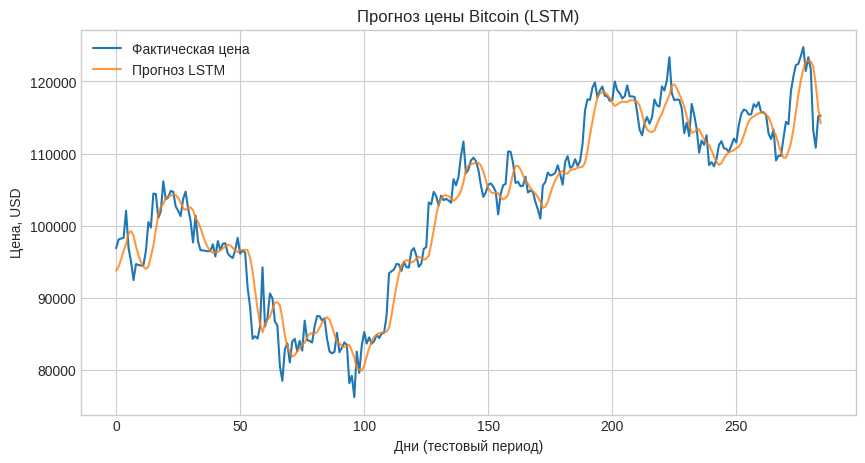

In [49]:
plt.figure(figsize=(10, 5))
plt.plot(y_test_lstm, label='Фактическая цена')
plt.plot(predictions['LSTM'], label='Прогноз LSTM', alpha=0.8)
plt.title('Прогноз цены Bitcoin (LSTM)')
plt.xlabel('Дни (тестовый период)')
plt.ylabel('Цена, USD')
plt.legend()
plt.show()

In [51]:
# Ансамбль моделей
# Простое усреднение прогнозов от лучших моделей
predictions['Ensemble'] = (predictions['Random Forest'] + predictions['XGBoost'] + predictions['LightGBM']) / 3

rmse_ensemble = np.sqrt(mean_squared_error(y_test, predictions['Ensemble']))
print(f"RMSE для Ансамбля (RF+XGB+LGBM): {rmse_ensemble:.2f}")


RMSE для Ансамбля (RF+XGB+LGBM): 9071.67


In [59]:
# Метрики качества моделей

# RMSE (Root Mean Squared Error) средняя ошибка в тех же единицах, что и цена (чем меньше — тем лучше)
# MAE (Mean Absolute Error) средняя абсолютная ошибка, менее чувствительна к выбросам
# MAPE (Mean Absolute Percentage Error) ошибка в процентах (насколько % прогноз отличается от факта)

# Рассчитывает процент правильного предсказания направления движения цены
def calculate_directional_accuracy(y_true, y_pred):

    # Создаем DataFrame для удобства
    y_true_series = pd.Series(y_true).reset_index(drop=True)
    y_pred_series = pd.Series(y_pred).reset_index(drop=True)

    # Направление фактического движения (True если цена выросла, False если упала)
    true_direction = (y_true_series.diff() > 0).iloc[1:]

    # Направление предсказанного движения
    pred_direction = (y_pred_series.diff() > 0).iloc[1:]

    # Считаем, сколько раз направления совпали
    return (true_direction == pred_direction).mean() * 100

results_data = []

for name, pred in predictions.items():
    # Для LSTM используем свой y_test, т.к. размерности могут отличаться
    y_true = y_test_lstm if name == 'LSTM' else y_test

    rmse = np.sqrt(mean_squared_error(y_true, pred))
    mae = mean_absolute_error(y_true, pred)
    mape = mean_absolute_percentage_error(y_true, pred)
    dir_acc = calculate_directional_accuracy(y_true, pred)

    results_data.append({
        'Model': name,
        'RMSE (USD)': rmse,
        'MAE (USD)': mae,
        'MAPE (%)': mape * 100,
        'Directional Accuracy (%)': dir_acc
    })

df_results = pd.DataFrame(results_data).sort_values(by='RMSE (USD)').reset_index(drop=True)

# --- Вывод сводной таблицы ---
print("Сводная таблица по качеству моделей:")
# Форматируем вывод для лучшей читаемости
df_display = df_results.copy()
df_display['RMSE (USD)'] = df_display['RMSE (USD)'].map('{:,.2f}'.format)
df_display['MAE (USD)'] = df_display['MAE (USD)'].map('{:,.2f}'.format)
df_display['MAPE (%)'] = df_display['MAPE (%)'].map('{:.2f}'.format)
df_display['Directional Accuracy (%)'] = df_display['Directional Accuracy (%)'].map('{:.2f}'.format)
print(df_display.to_string())

Сводная таблица по качеству моделей:
               Model RMSE (USD) MAE (USD) MAPE (%) Directional Accuracy (%)
0  Linear Regression     759.50    529.86     0.53                    85.21
1               LSTM   2,934.30  2,145.73     2.12                    51.06
2      Random Forest   7,031.41  4,960.57     4.56                    72.54
3           Ensemble   9,071.67  6,775.37     6.12                    79.93
4            XGBoost   9,952.17  7,927.51     7.36                    71.83
5           LightGBM  11,180.29  9,064.61     8.35                    74.30


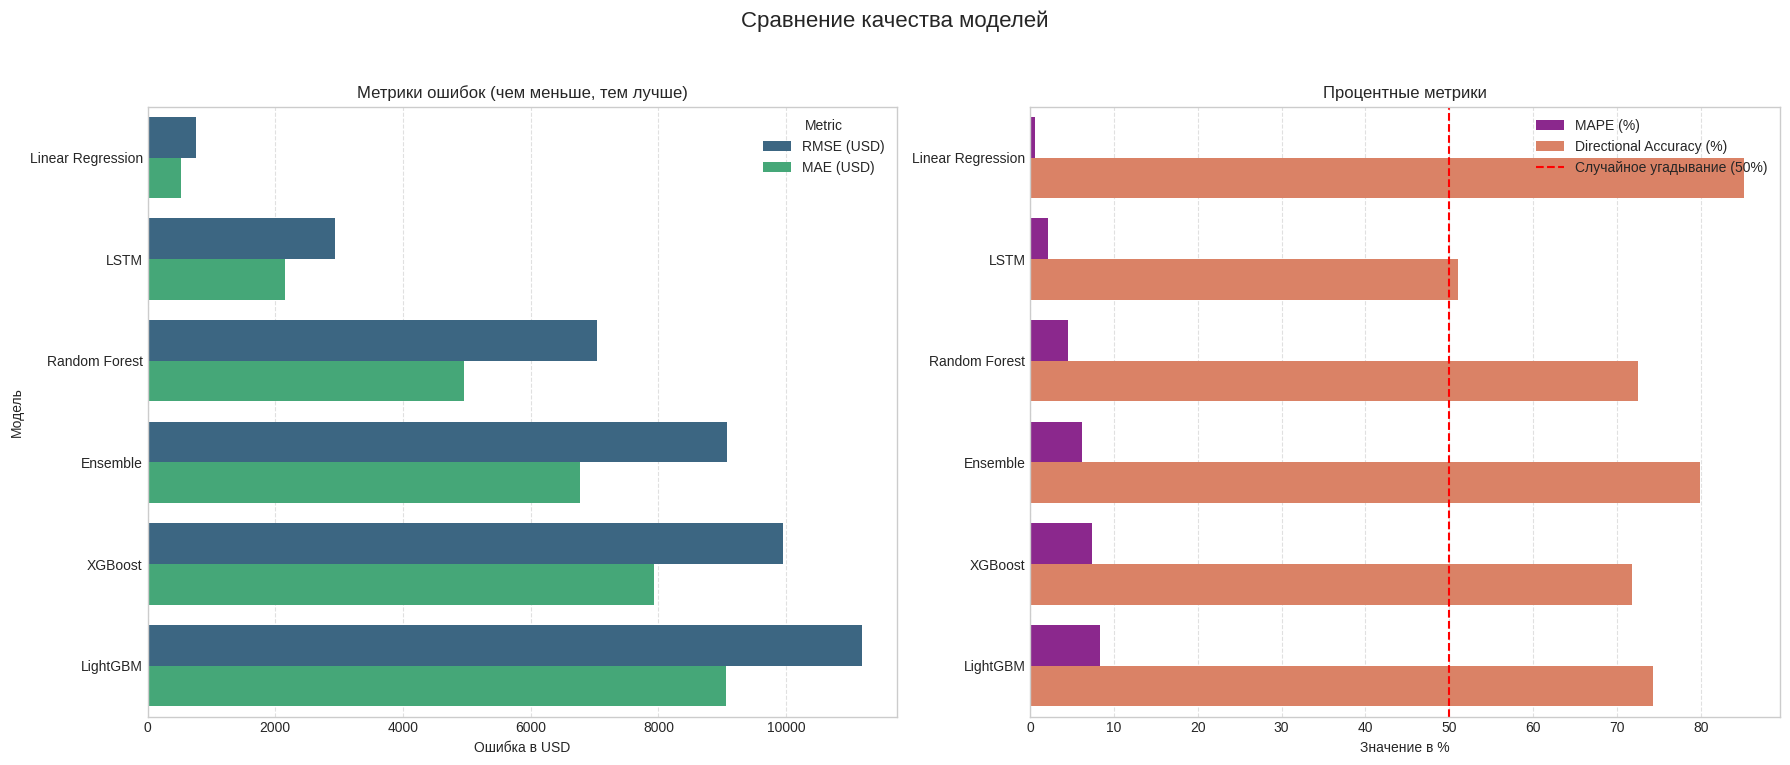

In [60]:
# Визуализация метрик
fig, axes = plt.subplots(1, 2, figsize=(18, 8))
fig.suptitle('Сравнение качества моделей', fontsize=16)

# Метрики ошибок в USD
df_melted_errors = df_results.melt(id_vars='Model', var_name='Metric', value_vars=['RMSE (USD)', 'MAE (USD)'], value_name='Error (USD)')
sns.barplot(x='Error (USD)', y='Model', hue='Metric', data=df_melted_errors, ax=axes[0], palette='viridis', orient='h')
axes[0].set_title('Метрики ошибок (чем меньше, тем лучше)')
axes[0].set_xlabel('Ошибка в USD')
axes[0].set_ylabel('Модель')
axes[0].grid(axis='x', linestyle='--', alpha=0.6)

# Процентные метрики
df_melted_percent = df_results.melt(id_vars='Model', var_name='Metric', value_vars=['MAPE (%)', 'Directional Accuracy (%)'], value_name='Value (%)')
sns.barplot(x='Value (%)', y='Model', hue='Metric', data=df_melted_percent, ax=axes[1], palette='plasma', orient='h')
axes[1].set_title('Процентные метрики')
axes[1].set_xlabel('Значение в %')
axes[1].set_ylabel('')
axes[1].grid(axis='x', linestyle='--', alpha=0.6)
axes[1].axvline(x=50, color='red', linestyle='--', label='Случайное угадывание (50%)')
axes[1].legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Генерация графиков прогнозов для каждой модели


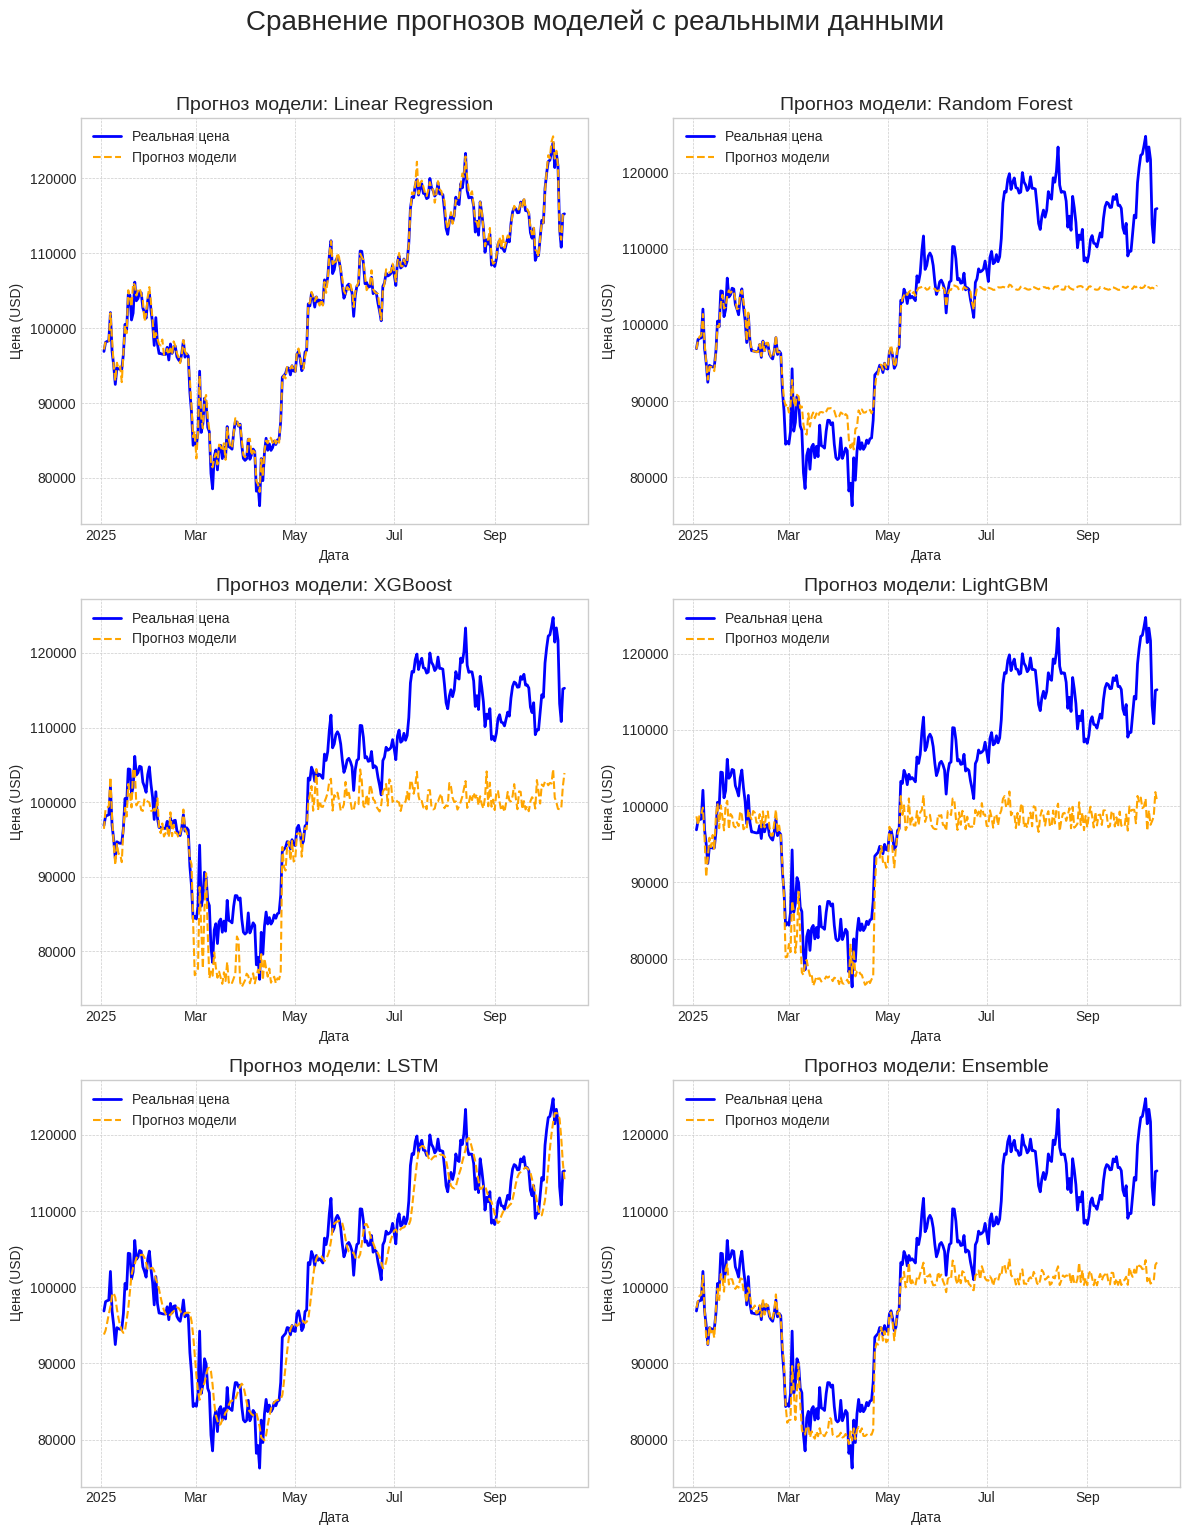

In [70]:
# Визуализация прогнозов для каждой модели

# Определяем количество моделей и создаем сетку для графиков
model_names = list(predictions.keys())
n_models = len(model_names)
n_cols = 2
n_rows = (n_models + 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, n_rows * 5), squeeze=False)
axes = axes.flatten()

print("Генерация графиков прогнозов для каждой модели")

# Мы берем последние TEST_DAYS дат из нашего отфильтрованного DataFrame `df`.
test_dates = df['Date'].iloc[-TEST_DAYS:]

for i, (name, pred) in enumerate(predictions.items()):
    ax = axes[i]

    # Для LSTM используем свой y_test. Длины должны совпадать с TEST_DAYS.
    y_true = y_test_lstm if name == 'LSTM' else y_test.values

    # Убедимся, что количество дат совпадает с количеством прогнозов
    # Это важно, если в будущем появятся модели с другим размером вывода
    current_dates = test_dates[-len(pred):]

    ax.plot(current_dates, y_true, label='Реальная цена', color='blue', linewidth=2)
    ax.plot(current_dates, pred, label='Прогноз модели', color='orange', linestyle='--')

    ax.set_title(f'Прогноз модели: {name}', fontsize=14)
    ax.set_xlabel('Дата')
    ax.set_ylabel('Цена (USD)')
    ax.legend()
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)

    locator = mdates.AutoDateLocator(minticks=5, maxticks=7) # Управляем плотностью меток
    formatter = mdates.ConciseDateFormatter(locator) # Улучшенный форматтер

    ax.xaxis.set_major_locator(locator)
    ax.xaxis.set_major_formatter(formatter)

# Удаляем пустые графики
if n_models < len(axes):
    for i in range(n_models, len(axes)):
        fig.delaxes(axes[i])

fig.suptitle('Сравнение прогнозов моделей с реальными данными', fontsize=20, y=1.02)
plt.tight_layout()
plt.show()

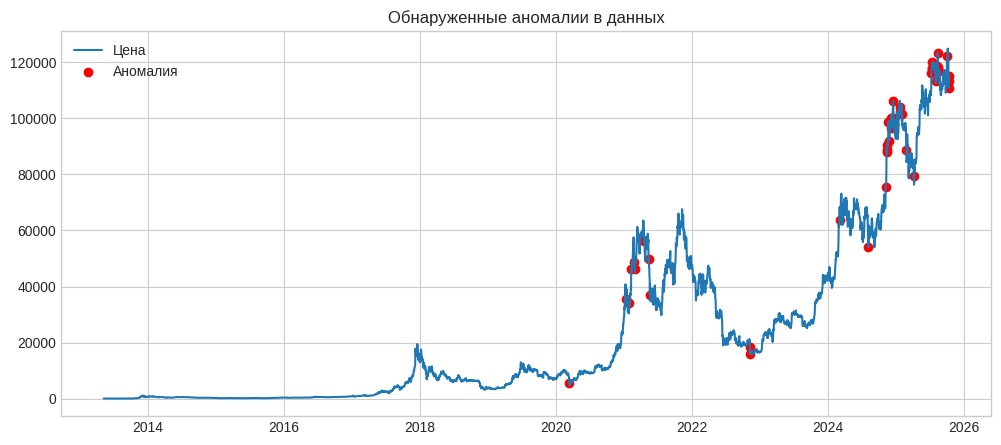

In [64]:
# Поиск аномалий с помощью Isolation Forest

iso = IsolationForest(contamination=0.01, random_state=42)
df['anomaly'] = iso.fit_predict(df[['Close', 'Volume']])
anomalies = df[df['anomaly'] == -1]

plt.figure(figsize=(12,5))
plt.plot(df['Date'], df['Close'], label='Цена')
plt.scatter(anomalies['Date'], anomalies['Close'], color='red', label='Аномалия')
plt.legend()
plt.title('Обнаруженные аномалии в данных')
plt.show()

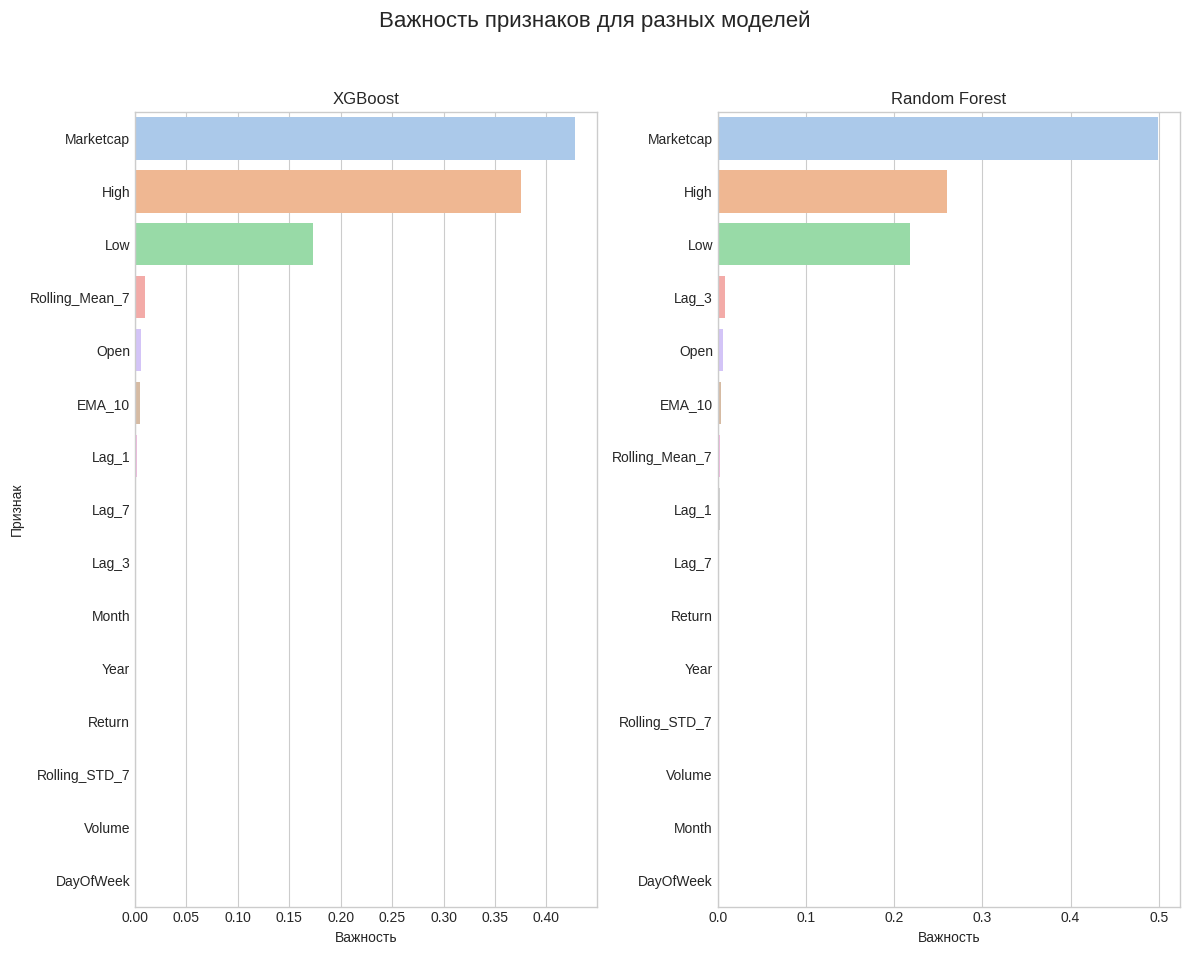

In [75]:
# Анализ важности признаков

# Извлекаем важность признаков из двух моделей
# Модели должны быть уже обучены на предыдущих шагах
feature_names = X_train.columns

# XGBoost
importances_xgb = xgb_model.feature_importances_
df_importance_xgb = pd.DataFrame({'Feature': feature_names, 'Importance': importances_xgb})
df_importance_xgb = df_importance_xgb.sort_values(by='Importance', ascending=False)

# Random Forest
importances_rf = rf.feature_importances_
df_importance_rf = pd.DataFrame({'Feature': feature_names, 'Importance': importances_rf})
df_importance_rf = df_importance_rf.sort_values(by='Importance', ascending=False)

# Визуализация
fig, axes = plt.subplots(1, 2, figsize=(12, 10))
fig.suptitle('Важность признаков для разных моделей', fontsize=16)

# График для XGBoost
sns.barplot(x='Importance', y='Feature', data=df_importance_xgb, ax=axes[0], palette='pastel', hue='Feature', legend=False)
axes[0].set_title('XGBoost')
axes[0].set_xlabel('Важность')
axes[0].set_ylabel('Признак')

# График для Random Forest
sns.barplot(x='Importance', y='Feature', data=df_importance_rf, ax=axes[1], palette='pastel', hue='Feature', legend=False)
axes[1].set_title('Random Forest')
axes[1].set_xlabel('Важность')
axes[1].set_ylabel('')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()